In [1]:
import openai
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Set up OpenAI API credentials
openai.api_key = ""

# Load the train and test datasets
train_data = pd.read_csv("./data/train_problem_correct_solution_window_3.csv")
test_data = pd.read_csv("./data/test_problem_correct_solution_window_3.csv")

# Encode the labels
label_encoder = LabelEncoder()
train_data["label"] = label_encoder.fit_transform(train_data["label"])
test_data["label"] = label_encoder.transform(test_data["label"])

# Function to get embeddings for a given text using the OpenAI API
def get_embeddings(text):
    response = openai.Embedding.create(
        input=text,
        model="text-embedding-3-small"
    )
    return response["data"][0]["embedding"]

# Get embeddings for the train and test data using tqdm for progress tracking
train_embeddings = []
for text in tqdm(train_data["text"], desc="Train Embeddings"):
    train_embeddings.append(get_embeddings(text))

test_embeddings = []
for text in tqdm(test_data["text"], desc="Test Embeddings"):
    test_embeddings.append(get_embeddings(text))



Train Embeddings:   0%|          | 0/12646 [00:00<?, ?it/s]


APIRemovedInV1: 

You tried to access openai.Embedding, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [ ]:
# Train a simple classifier (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(list(train_embeddings), train_data["label"])

# Make predictions on the test data
test_predictions = classifier.predict(list(test_embeddings))

# Calculate accuracy
accuracy = accuracy_score(test_data["label"], test_predictions)
print(f"Accuracy: {accuracy}")

/var/data/python/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.38161290322580643


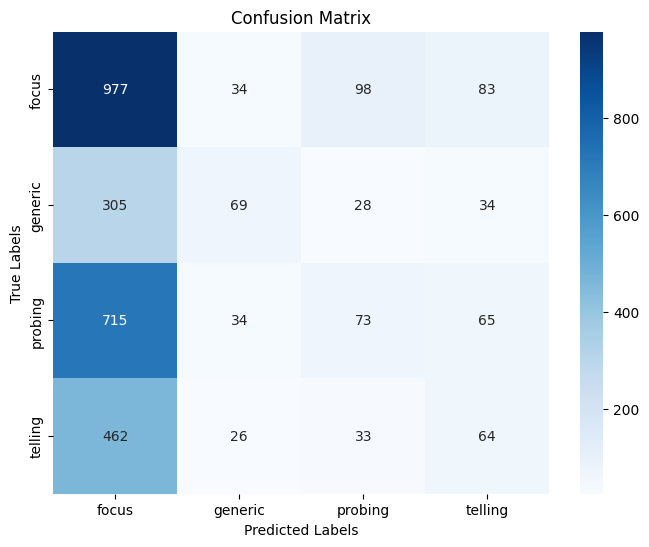

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(test_data["label"], test_predictions)
class_names = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# plt.show()
plt.savefig("window_1_open_ai.png")